In [2]:
import pandas as pd 

In [7]:
data = pd.read_csv("tweets.csv") 
data.head()

,user,fullname,tweet-id,timestamp,url,likes,replies,retweets,text,html
0,julia_vaingurt,Julia Vaingurt,746855460402302976,2016-06-25 23:59:52,/julia_vaingurt/status/746855460402302976,0,0,0,Bitcoin: Pissed-off customers sue GAW Miners i...,"<p class=""TweetTextSize js-tweet-text tweet-te..."
1,haj1106,hunter,746855393695924224,2016-06-25 23:59:36,/haj1106/status/746855393695924224,0,0,0,I'm not gone lie I be staring at pplwhat btc's...,"<p class=""TweetTextSize js-tweet-text tweet-te..."
2,rimbit,Rimbit ➡,746855315589652480,2016-06-25 23:59:17,/rimbit/status/746855315589652480,0,0,0,Did you miss Beyond Bitcoin Hangout? I CANNOT ...,"<p class=""TweetTextSize js-tweet-text tweet-te..."
3,coinstories,Coin Stories,746855306026680321,2016-06-25 23:59:15,/coinstories/status/746855306026680321,0,0,0,What are the merits and risks of investing in ...,"<p class=""TweetTextSize js-tweet-text tweet-te..."
4,bitcointonic,Julia Edling,746855274816798720,2016-06-25 23:59:08,/bitcointonic/status/746855274816798720,1,0,1,Hash Ocean #Bitcoin Cloud Mining №1 in the wor...,"<p class=""TweetTextSize js-tweet-text tweet-te..."


In [8]:
desc = data.describe()
del data['html'];
del data['url'];
data.head()

,user,fullname,tweet-id,timestamp,likes,replies,retweets,text
0,julia_vaingurt,Julia Vaingurt,746855460402302976,2016-06-25 23:59:52,0,0,0,Bitcoin: Pissed-off customers sue GAW Miners i...
1,haj1106,hunter,746855393695924224,2016-06-25 23:59:36,0,0,0,I'm not gone lie I be staring at pplwhat btc's...
2,rimbit,Rimbit ➡,746855315589652480,2016-06-25 23:59:17,0,0,0,Did you miss Beyond Bitcoin Hangout? I CANNOT ...
3,coinstories,Coin Stories,746855306026680321,2016-06-25 23:59:15,0,0,0,What are the merits and risks of investing in ...
4,bitcointonic,Julia Edling,746855274816798720,2016-06-25 23:59:08,1,0,1,Hash Ocean #Bitcoin Cloud Mining №1 in the wor...


In [9]:
import numpy as np
data['timestamp'] = pd.to_datetime(data['timestamp']).astype(int)
data.head()


,user,fullname,tweet-id,timestamp,likes,replies,retweets,text
0,julia_vaingurt,Julia Vaingurt,746855460402302976,1466899192000000000,0,0,0,Bitcoin: Pissed-off customers sue GAW Miners i...
1,haj1106,hunter,746855393695924224,1466899176000000000,0,0,0,I'm not gone lie I be staring at pplwhat btc's...
2,rimbit,Rimbit ➡,746855315589652480,1466899157000000000,0,0,0,Did you miss Beyond Bitcoin Hangout? I CANNOT ...
3,coinstories,Coin Stories,746855306026680321,1466899155000000000,0,0,0,What are the merits and risks of investing in ...
4,bitcointonic,Julia Edling,746855274816798720,1466899148000000000,1,0,1,Hash Ocean #Bitcoin Cloud Mining №1 in the wor...


In [10]:
#data['timestamp'] = pd.to_datetime(data['timestamp'])
#data['timestamp'] = pd.to_timedelta(data['timestamp'], unit='ns')
#data.head()

In [11]:
coinData = pd.read_csv("bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv")
coinData.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from datetime import datetime

In [13]:
now = datetime.now()
timestamp = datetime.timestamp(now)
print("timestamp =", int(timestamp))
timestamp = 1545730073
dt_object = datetime.fromtimestamp(timestamp)
print(str(dt_object))

timestamp = 1576005528
2018-12-25 02:27:53


In [14]:
pd.to_datetime(coinData['Timestamp']).apply(lambda x: x.date())

0          1970-01-01
1          1970-01-01
2          1970-01-01
3          1970-01-01
4          1970-01-01
              ...    
3997692    1970-01-01
3997693    1970-01-01
3997694    1970-01-01
3997695    1970-01-01
3997696    1970-01-01
Name: Timestamp, Length: 3997697, dtype: object

In [15]:
coinData = coinData.rename(columns = {'Timestamp':'timestamp'})
#coinData.info()
result = pd.merge(data, coinData, how='left', on=['timestamp'])
result.head()

,user,fullname,tweet-id,timestamp,likes,replies,retweets,text,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,julia_vaingurt,Julia Vaingurt,746855460402302976,1466899192000000000,0,0,0,Bitcoin: Pissed-off customers sue GAW Miners i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,haj1106,hunter,746855393695924224,1466899176000000000,0,0,0,I'm not gone lie I be staring at pplwhat btc's...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,rimbit,Rimbit ➡,746855315589652480,1466899157000000000,0,0,0,Did you miss Beyond Bitcoin Hangout? I CANNOT ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,coinstories,Coin Stories,746855306026680321,1466899155000000000,0,0,0,What are the merits and risks of investing in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bitcointonic,Julia Edling,746855274816798720,1466899148000000000,1,0,1,Hash Ocean #Bitcoin Cloud Mining №1 in the wor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#result.to_csv('intermediate.csv', header=False, index=False) 

In [26]:
for index, row in data.iterrows():
    if(index == 5):
        break
    print(row['tweet-id'], row['replies'])

746855460402302976 0
746855393695924224 0
746855315589652480 0
746855306026680321 0
746855274816798720 0


In [3]:
data = pd.read_csv("tweets.csv") 


In [9]:
users = {}
for index, row in data.iterrows():
    if index == 100:
        break
    if row['user'] not in users:
        users[row['user']] = [[row['tweet-id'],row['timestamp'],row['likes'],row['replies'],row['retweets']]]
    else:
        users[row['user']].append([row['tweet-id'],row['timestamp'],row['likes'],row['replies'],row['retweets']])


In [10]:
groups = data.groupby('user')

In [15]:
type(groups)
groups.groups

{'000000000OOK': Int64Index([1764058, 1767311], dtype='int64'),
 '00001V': Int64Index([822991], dtype='int64'),
 '0000Marcos0': Int64Index([1671839], dtype='int64'),
 '0000ZHUMA': Int64Index([1645343], dtype='int64'),
 '0000derek': Int64Index([1324026], dtype='int64'),
 '0000mik_knt000': Int64Index([257518], dtype='int64'),
 '00015Rajesh': Int64Index([1279909, 1329194, 1406691], dtype='int64'),
 '000Bloger': Int64Index([768500], dtype='int64'),
 '000Daniel010': Int64Index([1763077], dtype='int64'),
 '000Exp': Int64Index([249503], dtype='int64'),
 '000MX2': Int64Index([1297550, 1344665], dtype='int64'),
 '000frank000': Int64Index([437608], dtype='int64'),
 '000jhs': Int64Index([1000525, 1024764, 1078566, 1120445, 1169271, 1172428], dtype='int64'),
 '000kkrish': Int64Index([1202996, 1203028], dtype='int64'),
 '0018_noah': Int64Index([964537], dtype='int64'),
 '001BR4V0': Int64Index([887153], dtype='int64'),
 '001jhon001': Int64Index([414899], dtype='int64'),
 '001lightRain': Int64Index([

In [16]:
type(groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [32]:
#df['score_ranked']=df['Score'].rank(ascending=0,method='max')
data['rank_likes'] = data['likes'].rank(ascending=0,method='max')
#del data['html'];
#del data['url'];
#del data['text'];
data['rank_retweets'] = data['retweets'].rank(ascending=0,method='max')
data['rank_replies'] = data['replies'].rank(ascending=0,method='max')
#data.head()

data_likes = data.sort_values(by=['rank_likes'])
data_retweets = data.sort_values(by=['rank_retweets'])
data_replies = data.sort_values(by=['rank_replies'])

data_likes.head()


,user,fullname,tweet-id,timestamp,likes,replies,retweets,rank_likes,rank_retweets,rank_replies
873538,StephenAtHome,Stephen Colbert,939355676551376896,2017-12-09 04:47:00,130455,1049,22002,1.0,2.0,16.0
941467,cryptomanran,Ran NeuNer,939165804809027585,2017-12-08 16:12:31,111580,449,36467,2.0,1.0,55.0
965930,Shanehasabeard,Shane,939117861271982081,2017-12-08 13:02:00,40489,172,9167,3.0,5.0,139.0
1666461,CarlosBolsonaro,Carlos Bolsonaro,1087395915520974848,2019-01-21 17:06:03,17676,622,3352,4.0,15.0,41.0
349925,MKBHD,Marques Brownlee,960861127214235648,2018-02-06 13:01:59,15974,479,3058,5.0,17.0,51.0


In [33]:
data_retweets.head()

,user,fullname,tweet-id,timestamp,likes,replies,retweets,rank_likes,rank_retweets,rank_replies
941467,cryptomanran,Ran NeuNer,939165804809027585,2017-12-08 16:12:31,111580,449,36467,2.0,1.0,55.0
873538,StephenAtHome,Stephen Colbert,939355676551376896,2017-12-09 04:47:00,130455,1049,22002,1.0,2.0,16.0
863516,6BillionPeople,MarQuis Trill | Mr. Giveaway 🐐,939400284983447552,2017-12-09 07:44:15,2175,439,18364,59.0,3.0,57.0
968592,kucoincom,KUCOIN,939111659896954880,2017-12-08 12:37:22,270,63,13459,1733.0,4.0,575.0
965930,Shanehasabeard,Shane,939117861271982081,2017-12-08 13:02:00,40489,172,9167,3.0,5.0,139.0


In [50]:
data_replies.head()

,user,fullname,tweet-id,timestamp,likes,replies,retweets,rank_likes,rank_retweets,rank_replies
1370431,bethereumteam,Bethereum,981671592387317761,2018-04-04 23:15:20,1520,3342,1279,109.0,66.0,1.0
1411472,Netkoin,Netkoin,981449439184384000,2018-04-04 08:32:35,1997,3322,1847,71.0,50.0,2.0
1274902,bethereumteam,Bethereum,982234657000312833,2018-04-06 12:32:45,1475,3300,1218,118.0,71.0,3.0
1395836,bethereumteam,Bethereum,981535511448875008,2018-04-04 14:14:36,1455,3070,1184,123.0,75.0,4.0
1414246,bethereumteam,Bethereum,981431477018726400,2018-04-04 07:21:12,1496,3057,1217,113.0,72.0,5.0


In [79]:
data_group = data.sort_values(by=['rank_likes', 'rank_retweets','rank_replies'])
#data_ranks = data.sort_values(by=['rank_likes', 'rank_retweets','rank_replies'])
data_group.reset_index(drop=True)
data_group  = data_group.groupby(['user'])

In [93]:
import time
persons_df = pd.DataFrame(columns=['name','likes_mean','retweets_mean','replies_mean'])

def insert(df, row):
    insert_loc = df.index.max()

    if pd.isna(insert_loc):
        df.loc[0] = row
    else:
        df.loc[insert_loc + 1] = row
i=0
print(len(data_group))
start = time.time()
for name, group in data_group:
    insert(persons_df,[name,group['likes'].mean(),group['retweets'].mean(),group['replies'].mean()])
    i=i+1
    if i==50000:
        break
end = time.time()
print(persons_df.head(),end-start)

352057
           name  likes_mean  retweets_mean  replies_mean
0  000000000OOK         0.0            0.0           0.5
1        00001V         0.0            0.0           1.0
2   0000Marcos0         1.0            0.0           0.0
3     0000ZHUMA         0.0            0.0           0.0
4     0000derek         1.0            0.0           1.0 175.79409790039062


In [101]:
persons_df = persons_df.sort_values(by=['likes_mean', 'retweets_mean','replies_mean'],ascending=False)

result = persons_df.head(10)
for index,row in result.iterrows():
    print(row['name'])

CarlosBolsonaro
BillRatchet
Boogie2988
22loops
ChumelTorres
DaftLimmy
CHABUDDYGEEZY
CheesmanArt
BrianDEvans
CoinPulseEx


In [144]:

df = pd.read_csv("tweets.csv") 

In [188]:
#df['mention'] = df.text.str.findall(r'(?<![@\w])@(\w{1,25})').apply(' ,'.join)
import re
df['mention'] = df.text.str.findall(r'(?<![@\w])@(\w{1,25})').apply(str)
#df = df.iloc[:20000]

#print(len(df))
for index, group in df.text.iteritems():
    s = s+"@sdfsd @dsfsdfsdf"
    result = re.findall("(?<![@\w])@(\w{1,25})", s)
    #print(len(result))
    #print(str(result))
    break


In [221]:
df = df[df['mention'] != '[]']

,user,fullname,tweet-id,timestamp,url,likes,replies,retweets,text,html,mention
5,onlineplatforms,Investors Europe,746855266210156545,2016-06-25 23:59:06,/onlineplatforms/status/746855266210156545,0,0,0,Tumultuous Week Fuels 30% Gain in Bitcoin and ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['investorseurope']
12,onlineplatforms,Investors Europe,746854801170890753,2016-06-25 23:57:15,/onlineplatforms/status/746854801170890753,0,0,0,Bitcoin Price Plunges Below $700 As Market Out...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['investorseurope']
34,TheCryptoPoll,The Cypto Poll,746854004894760960,2016-06-25 23:54:05,/TheCryptoPoll/status/746854004894760960,0,0,5,http://Sia.tech soon to hit 200 satoshi? \n-\...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['SiaTechHQ']
44,VitimVTR,Victor Silva,746853600966623232,2016-06-25 23:52:28,/VitimVTR/status/746853600966623232,0,0,0,http://ClaimBTC.com : Free bitcoin faucet with...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['sharethis']
45,ProjectPeachUK,Project Peach,746853471463309313,2016-06-25 23:51:58,/ProjectPeachUK/status/746853471463309313,1,0,2,We build #nextgen #html5 realtime #webdesign! ...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['CashClamber']
...,...,...,...,...,...,...,...,...,...,...,...
19925,Stevejayd,SJD,896869989273157632,2017-08-13 23:04:03,/Stevejayd/status/896869989273157632,0,0,0,@TimInHonolulu @Anglin's reported income brack...,"<p class=""TweetTextSize js-tweet-text tweet-te...","['TimInHonolulu', 'Anglin']"
19941,baijorge,Freedom,896869765070823425,2017-08-13 23:03:09,/baijorge/status/896869765070823425,1,0,1,How much stupidity are able these clowns @busi...,"<p class=""TweetTextSize js-tweet-text tweet-te...","['business', 'BloombergTV', 'Forbes', 'CNBC', ..."
19960,austfintech,Australian FinTech,896869546337771520,2017-08-13 23:02:17,/austfintech/status/896869546337771520,6,0,2,Living @RoomofSatoshi allows you to pay your b...,"<p class=""TweetTextSize js-tweet-text tweet-te...","['RoomofSatoshi', 'BPAY_AU']"
19961,MoosePicks_,Jack Pot,896869545721425925,2017-08-13 23:02:17,/MoosePicks_/status/896869545721425925,0,0,0,Tonight's #Bitcoin price is $4100.41 via Chain...,"<p class=""TweetTextSize js-tweet-text tweet-te...",['MoosePicks_']


In [229]:
#df['mention'] = df.text.str.findall(r'(?<![@\w])@(\w{1,25})').apply(str)
#df = df[df['mention'] != '[]']
def read_tweets():
    tweets = {}
    users = {}
    for index,row in df.iterrows():
        tweets[row['tweet-id']] = row['mention']
        users[row['tweet-id']] = row['user']
    return tweets

print(read_tweets())

{746855266210156545: "['investorseurope']", 746854801170890753: "['investorseurope']", 746854004894760960: "['SiaTechHQ']", 746853600966623232: "['sharethis']", 746853471463309313: "['CashClamber']", 746853449338257408: "['UKinJapan']", 746853249894883328: "['CryptoCoinsNews']", 746853114406281216: "['bitkongme']", 746852905169231872: "['eEamerica']", 746852164723585025: "['HELPSCOIN']", 746851879091605504: "['kazonomics']", 746851837937016832: "['CoinDesk']", 746851771377717248: "['CertainAssets', 'Steemit']", 746851651894403073: "['denverpost']", 746851267796938752: "['investorseurope']", 746850808428363776: "['YouTube']", 746850596867702784: "['gooeybrains']", 746850237801631744: "['WIRED']", 746850026643722241: "['LANACION']", 746849899170299904: "['technology']", 746849849224499200: "['dannylmasters', 'VinnyLingham', 'EvanderSmart', 'JayCoDon']", 746849445749227520: "['GroovyBruce']", 746849098305679361: "['matthew_d_green', 'purevpn']", 746848880071938052: "['612954']", 746848843

In [238]:
s = "['XotikaTv', 'TiffRoyal']"
res = s.strip('][').split(', ') 
print(res)
for i in range(len(res)):
    res[i] = res[i].strip("'")
print(res,)

["'XotikaTv'", "'TiffRoyal'"]
['XotikaTv', 'TiffRoyal']


In [184]:
x

'Series([], )'

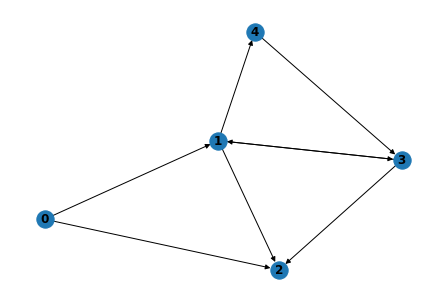

In [247]:
import networkx as nx  
import matplotlib.pyplot as plt
G=nx.DiGraph()
G.add_node(0),G.add_node(1),G.add_node(2),G.add_node(3),G.add_node(4)
G.add_edge(0, 1),G.add_edge(1, 2),G.add_edge(0, 2),G.add_edge(1, 4),G.add_edge(1, 3),G.add_edge(3, 2),G.add_edge(3,1),G.add_edge(4,3)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

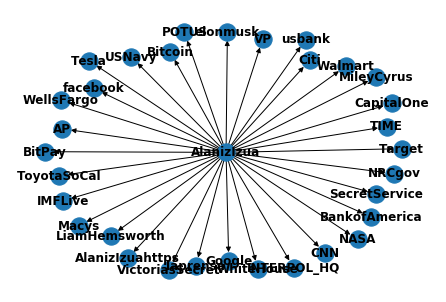

In [262]:
s = { 'RajuRajakEtawah': ['thewirehindi', 'sunilyadv_unnao', 'myogiadityanath', 'anuragspparty', 'CMOfficeUP', 'drdineshbjp', 'DrMNPandeyMP', 'narendramodi', 'kpmaurya1pic', 'UPGovt', 'BJP4UP'], 'WRCInvest': ['NewYorkLife', 'Vanguard_Group', 'Fidelity', 'Bitcoin', 'sovereignfunds', 'AmericanExpress', 'CJFDillow', 'swfinstitute', 'soumayakeynes', 'gabrielsterne', 'iiSWC', 'bondvigilantes', 'EMInvestment', 'erikfossing', 'dkyriakopoulou', 'williamsonchrispic', 'baptist_simon', 'williamsonchris', 'soumayakeynespic'], 'XRProdigy': ['digitalassetbuy', 'Cryptonary_', 'CKJCryptonews', 'XRPTrump', 'ByFaithIWalk_', 'RobertArtRobArt', 'LoveForCrypto17https'], 'padjarwoko': ['Sky201805', 'padjarwoko', 'DACCblockchain', 'KoreaDacc', 'Uris_iopic', 'YouTube'], 'Unconfiscatabl1': ['Zezolinko', 'unconfiscatable', 'ToneVays', 'jimmysong', 'peterktodd', 'maxkeiser', 'stacyherbert', 'giacomozucco', 'janbraiins', 'LucidInvestment', 'UglyOldGoat1', 'LeahWald', 'saifedean', 'MustStopMurad'], 'satoshua': ['CloakCoin', 'Binance', 'EventBinance', 'binance', 'cloakcoin_promo', 'cloakcoin'], 'OdysseyHack': ['jutta_steiner', 'ParityTech', 'provoost', 'trentmc0', 'oceanprotocol', 'th_s4m0ht', 'CryptoMice', 'eriklaan', 'EyeOnOrbit', 'williesmits'], 'Seymour_Results': ['peterevoss', 'bengoertzel', 'HamiltonMorris', '4LOVofScience', 'MaryRuwart', 'officialmcafee', 'Snowden', 'eff'], 'Kawasaki__900': ['MarianneThamm', 'tito_mboweni', 'wayneduv', 'Natasha9Mazzone', 'BantuHolomisa', 'helenzille'], 'debimr75': ['Amazon', 'bpbonline', 'Bitcoin', 'Hyperledger', 'Ethereum', 'iotatoken'], 'BTC_Is_Freedom': ['TFTC21', 'Beautyon_', 'francispouliot_', 'saifedean', 'Ragnarly', 'MartyBent', 'stephanlivera', 'MustStopMurad', 'adam3us'], 'ChainBytes': ['DeutscheWelle', 'Twitter', 'bankofengland', 'businessinsider', 'ChainBytes', 'jeffreyatucker'], 'AdesinaKushanu': ['crypto_goat_', 'DarinBuzz', 'helenabitcoin', 'Mind3Bitcoin', 'cryptotracker73', 'CryptoNewsAus', 'pivot_pvt'], '55GlobalMarkets': ['coindesk', 'Cointelegraph', 'CryptoCoinsNews', 'BTCTN', 'newsbtc', 'Bitcoinist'], 'pandoras_box_x': ['MPD_yokushi', 'TwitterSafety', 'TwitterJapan', 'Twitter', 'jack', 'Verify'], 'AdayFive': ['DotCoin_nz', 'horizenglobal', 'arabianchain', 'ANON_WeAreANON', 'reddcoin', 'PolisBlockchain', 'Tronfoundation', 'vicetoken', 'lyl', 'mothershipcx'], 'Sunilch39732694': ['PKumar59', 'Aamitabh2', 'SarvendraEdu', 'myogiadityanath', 'DrMNPandeyMP', 'drdineshbjp', 'CMOfficeUP'], 'Elcryptomento': ['HawkofNewYork', 'sarahaustin', 'kobebryant', 'PoppyPOS', 'Andrei47664306', 'PundiXLabs', 'TronFrance'], 'williamgrahamiv': ['PeterSchiff', 'fundstrat', 'CoinbasePro', 'CryptoPhD', 'CasaHODL', 'lightning', 'UpholdInc', 'heleumapp', 'JackMallers', 'BOBmeetupCHI', 'BitPay', 'nlw', 'Starbucks', 'CryptoKeyStack', 'Mastercard', 'RobinhoodApp', 'grinMW', 'fluffypony', 'TheBlock__', 'CoinMarketCap', 'MustStopMurad', 'brucefentonhttps'], 'volkank0rkmaz': ['kriptoemre', 'kriptonuri', 'uzmancoin', 'CoinDelisi', 'coin_adam', 'coinkafasi'], 'unobjetivo': ['WomanBlockchain', 'TourDeCrypto', 'LoveHeartsToken', 'tommyp408', 'theemrsmcafee', 'mishalederman', 'Trezor', 'KimchiSocks', 'DecentralizeTRX', 'doc__com', 'CharlesNader', 'TRONDAPPS', 'BlockchainMT', 'europe_tron'], 'Airdropfre': ['SpectrumNtwork', 'cz_binance', 'LBank_Exchange', 'coindesk', 'SpectrumNetwork', 'Bancor', 'BithumbOfficial', 'coinexcom'], 'zahbenz': ['Ruleyorkpic', 'Felonious_munkpic', 'CrptoJoepic', 'crptocyberpic', 'Martin9B_pic', 'CrptoMniapic', 'crptoayapic', 'DigitalTrendspic'], 'hirdeshdubey89': ['PKumar59', 'Aamitabh2', 'SarvendraEdu', 'myogiadityanath', 'DrMNPandeyMP', 'drdineshbjp', 'CMOfficeUP'], 'FleretvInfo': ['ltc', 'xvg', 'btc', 'tokenpay', 'lisk', 'monero'], 'kennedy74707739': ['CryptoMichNL', 'jratcliff', 'fibonacci_the', 'JesusCh15800047', 'PlsGiveBitcoin', 'tn_crypto', 'Kenneth26947387', 'DeaterBob', 'jlboone1', 'PeterLBrandt', 'CicadaCrypto'], 'GIGhorizons': ['Michael_Laake', 'CryptoBasicPod', 'effectsToCause', 'bquittem', 'dergigi', 'timevalueofbtc', 'ChubbyCrypto', 'DrRunGood'], 'OrbisDomitor': ['CKOAfrica', 'CompanionFoods', 'FlashCoins', 'cnnbrk', 'EnkiAmo', 'Budda420DK', 'ChrisKitze', 'Darth_Flash', 'FlashWhale', 'jasonking_flash', 'flash_whale', 'CryptoWendyO', 'cryptobuyer', 'ghcryptoguy', 'JohnAgimDDI'], 'APOLLO_NAUT': ['Bitfi6', 'ApolloCurrency', 'SMcCullah', 'ForbesCrypto', 'Team_McAfeepic', 'Team_McAfee', 'CryptoCoinsNews', 'coindesk', 'CoinDeskMarkets', 'theemrsmcafeepic'], 'SuperWulkan': ['blockchain', 'crypto', 'binance', 'AltOne_Crypto', '_emerald_EMD_', 'Bleeding_Crypto', 'CryptDoMillons', 'VitalikButerin', 'CryptoVanessapic'], 'JBBarou': ['gregory_raymond', 'SebGouspillou', 'BigBlock_DC', 'PowerHasheur', 'JustMiningFr', 'BlockchainStud', 'ARCHOS', 'BCDipIoma', 'aitivity', 'PundiXLabs', 'daneelproject', 'LedgerHQ', 'BtuProtocol', 'LaFrenchTech'], 'TilakRa21541872': ['rastogijibjm', 'narendramod', 'PrakashJavdekar', 'myogiadityanath', 'drdineshbjp', 'UPGovt', 'PKumar59', 'SarvendraEdu', 'Sarvesh_Amethi', 'narendramodi', 'ChiefMinisterUP', 'Yogi_Aditynath', 'btc_morcha_2015', 'UPBtcbatch_2015', 'btcDELED', '01shivendra', 'sunilkumar45694', 'airnewsalerts', 'BBCHindi', 'ZeeNewsHindi', 'DDNewsLive', 'aajtak', 'abpnewshindi', 'tn66Mp2TP7fW2yv'], 'HotShotCoin': ['cryptotrader85', 'mocho', 'Hott3st2', 'Tha_trader', 'MrJessieSmith', 'BelieveAndHold', 'xomarsamx', 'Chiiaa5I'], 'GloriaP49210854': ['SEC_news', 'NYSE', 'Londonstock', 'EU', 'WSJeurope', 'Bloomberg', 'FT'], 'SandyLeeAndRonS': ['NiceBoyKimo', 'adorableoutfie', 'bitcoin_record', 'athletesmot', 'NexGoal', 'storytelerpic', 'rott_weilers', 'BodyBuildre', 'depththough', 'SujaS9', 'FashionOlio', 'TyMurphy19'], 'Fred66403709': ['globalcoinchain', 'Africainvestor', 'dervich2675', 'CRYPTOcINVESTOR', 'newsinvesting', 'CryptonewsCom', 'AsiaCrypto', 'CryptoIndiaNews', 'Africa_BTC', 'BBCOne', 'nytimes'], 'smarttapu': ['narendramodi', 'RahulGandhi', 'BJP4India', 'INCIndia', 'DesiCryptoHodlr', 'RBI', 'SecretaryDEA', 'MEAIndia', 'FinMinIndia', 'NischalShetty', 'cryptokanoon', 'Swamy39', 'NITIAayog'], 'teloscoin': ['nulltxnews', 'Cointelegraph', 'BTCTN', 'BTCFoundation', 'CoinKurier', 'YouTube', 'btc', 'nulltx'], 'mohamma72038173': ['vividcoinapp', 'cryptocurrency', 'cooper_5e', 'xrp334', 'bitoasis', 'RegalAsset', 'Rightbtc_', 'bitexuae', 'LocalBitcoins', 'BlocPal', 'Unicornhuntinfo', 'pingotv', 'RevolutApp', 'wemeitv', 'FameHollywood', 'tvfortune', 'scotiabank', 'TangerineBank'], 'Movilizateya': ['Querzel', 'Crypto_Flux', 'AndreHodl', 'taedolen1', 'CriptoCanarias', 'beincrypto', 'PaulADW', 'CEarning', 'Kediri_020', 'variedeventual', 'cryptohackers_', 'jfavier92300', 'cz_binance', '_Kevin_Pham', 'lopp', 'theonevortex', 'CryptoActu', 'gregory_raymondhttps'], 'SerchLuna04': ['TheCryptoMonk', 'TheCryptoDog', 'loomdart', 'LarpCapital', 'RNR_0', '_blob69', 'binance'], 'giglio_vince': ['ApolloCurrency', 'Bitfi6', 'officialmcafee', 'kevinolearytv', 'KimDotcom', 'Team_McAfeepic'], 'Laukeshkumar_': ['myogiadityanath', 'CMOfficeUP', 'drdineshbjp', 'kpmaurya1', 'PKumar59', 'BTC201517', 'btc_morcha_2015'], 'Vivekku84629691': ['Aamitabh2', 'PKumar59', 'shailesharora7', 'kpmaurya1', 'myogiadityanat', 'CMOfficeUP'], 'the_crypto_hobo': ['coinbase', 'CoinbasePro', 'CoinbaseSupport', 'CashApp', 'LedgerHQ', 'Crypto_Tag'], 'Crypto944': ['CKJCryptonews', 'digitalassetbuy', 'RippleXrpie', 'CryptoVanessa', 'KaatDamnCryptos', 'TheCryptoCandy', 'CryptoKirby', 'WillyWonkaXRP'], 'sharkcrypto': ['sharkcryptopic', 'stratrade_', 'vkorkmaz10', 'Coinologue', 'KralKrezus', 'altcointurk'], 'atsushi0817k': ['TNercpWMI2kAxDO', 'MKaaito', 'Nmikan818', 'd_life5', 'takapiro_s', '_btcfx5_', 'RewindRe', 'KrsDkpma9rAOw9K', 'Nomielbreak', 'henachoko_coin', 'immaculata20', 'retro18', 'hosoya_reha', '2Tlwvz6p9wMlEVV', '2S96nuqrVZCEfJT', 'enen217', 'Mako_2028_2019', 'BTCFX19', 'boassa77', 'ryota06933546'], 'mining4vets': ['IvanGuppy', 'Muertos_Cryptos', 'Crypto_Clod', 'cryptochrisw', 'AltTurtle', 'RequieumC', 'TheGemHunters', 'JilliNicole10', 'CryptoWendyO', 'CryptoShillNye', 'Cryptowillerupt', 'CryptusNoobius'], 'Ashwanisw2': ['PKumar59', 'kpmaurya1', 'drdineshbjp', 'anupmajaisbjp', 'myogiadityanath', 'PMOIndia', 'narendramodi', 'Aamitabh2'], 'madaboutmic': ['JimBTC', 'coinsiglieri', 'Crypto_God', 'DanDarkPill', 'WhalePanda', 'Excellion', 'RNR_0', 'StartaleTV', 'loomdart', '22loops'], 'ikonsnovio': ['JimBTC', 'coinsiglieri', 'Crypto_God', 'DanDarkPill', 'WhalePanda', 'Excellion', 'RNR_0', 'StartaleTV', 'loomdart', '22loops'], 'natajack': ['mariabustilloshttps', 'Forbes', 'ForbesCrypto', 'BitPay', 'spair', 'siamakmasnavi', 'CryptoGlobeInfo'], 'onmanipadmejun': ['DolarToday', 'DolarPromedio', 'DolarTrue_', 'BTC_Play_', 'MoviCambios', 'Cotizaciones_', 'theairtm', 'bolivarcucutapic', 'theairtmpic'], 'nodehubio': ['btc_green', 'XBIncognito', 'SocialSendCoin', 'PolisBlockchain', 'giant_coin', 'syscoin'], 'criativeli': ['AlexSchwartsman', 'ricardofries', 'octaviomier', 'monicadebrow', 'carlosgil83', 'GeraldoBold', 'geraldosamor'], 'MehmetKIRIK20': ['Cryptopia_NZ', 'nzpolice', 'INTERPOL_HQ', 'cz_binance', 'binance', 'officialmcafee'], 'Zeeshan55154001': ['binance', 'OKEx', 'Poloniex', 'BittrexExchange', 'Zeeshan', 'pundix', 'cz_binance', 'cryptocurrency', 'Btc', 'Neo', 'Eth', 'coindesk', 'CoinMarketCap', 'Zeeshan55154001', 'Cointelegraph', 'ETF', 'SatoshiLite', 'Bitcoin', 'bitfinex', 'Cryptopia_NZ', 'justinsuntron', 'Tronfoundation', 'officialmcafee', 'Crypto', 'Hotbit', 'phantasmachain', 'satoshiNakamotohttps'], 'gade_07': ['CryptooIndia', 'CryptoCoinsNews', 'NischalShetty', 'cryptokanoon', 'coindcx', 'CoinMarketCappic'], 'rcartman1': ['billbarhydt', 'AbraGlobal', 'OverstockCEO', 'tzeroblockchain', 'Overstock', 'jeffreyatucker'], 'popthunder': ['coinstar', 'CoinmeATM', 'Safeway', 'Samdattola', 'jessecouch', 'Crypto_Bitlord', 'theemrsmcafee', 'tommyp408', 'dandabek', 'doc__com'], 'FaunoTaBanque': ['cryptoastblog', 'Bitcoinmeta', 'jfavier92300', 'AdliTB', 'Ben_BitConseil', 'DUNOD', 'Eybesty'], 'pawany68': ['AmitShah', 'BJP4UP', 'rajnathsingh', 'kpmaurya1', 'drdineshbjp', 'narendramodi', 'myogiadityanath'], 'Ketting83': ['Cpollo_', 'ElectracoinECA', 'CYBR_Official', 'RapidsRPD', 'bleutrade', 'CoinBene', 'IDAXpro', 'Bitker1', 'paddystash', 'CryptoVanessa', 'CryptoShillNye', 'cazproject', 'CazShopOfficial', 'CazEx_Official'], 'VikasKu85086488': ['YogiAdityanath_', 'MohanBhagwat_', 'PKumar59', 'UPGovt', 'drnarottammisra', 'sudhirchaudhary', 'narendramodi', 'rajnathsingh', 'myogiadityanath', 'anupmajaisbjp', 'AmitShah', 'DrMNPandeyMP', 'drdineshbjp', 'kpmaurya1', 'ajaymishrteni'], 'BelieversCrypto': ['VRT', 'de_NVA', 'sp_a', 'cdenv', 'openvld', 'groenlinks', 'Vlaamsbelang1', 'PvdA'], 'mosharof562895': ['trabalho', 'usa', 'Matthewew1992', 'lookingforbad', 'SkyBattam', '_Regimmanuel'], 'geraud_maronne': ['Querzel', 'Crypto_Flux', 'AndreHodl', 'taedolen1', 'CriptoCanarias', 'beincrypto', 'PaulADW', 'CEarning', 'Kediri_020', 'variedeventual', 'cryptohackers_', 'jfavier92300', 'cz_binance', '_Kevin_Pham', 'lopp', 'theonevortex', 'CryptoActu', 'gregory_raymondpic'], 'AlanizIzua': ['POTUS', 'SecretService', 'VictoriasSecret', 'IMFLive', 'NRCgov', 'TIME', 'VP', 'elonmusk', 'Bitcoin', 'Google', 'BitPay', 'NASA', 'facebook', 'laprensa', 'Citi', 'usbank', 'WellsFargo', 'Tesla', 'ToyotaSoCal', 'CNN', 'AP', 'AlanizIzuahttps', 'INTERPOL_HQ', 'WhiteHouse', 'USNavy', 'Walmart', 'Macys', 'Target', 'CapitalOne', 'BankofAmerica', 'MileyCyrus', 'LiamHemsworth'], 'Biased_ca': ['jack', 'Twitter', 'Patreon', 'Google', 'Facebook', 'Apple', 'YouTube', 'DuckDuckGo', 'getongab', 'bitchute', 'Bitcoin'], 'And106MCU': ['ChangeorgLatino', 'QuidVacuo_', 'BuhardiMarvel', 'ManaByte', 'Bitcoin', 'LimitlessMovie', 'ladygaga'], 'monapachan': ['unknown_bitcoinさんへ', 'unknown_bitcoinさん', 'MONABAR_TOKYOさんから1', 'unknown_bitcoinさんお疲れ様です', 'KATE_necologyさんから1', 'unknown_bitcoinさんに'], '5omni': ['kurtwuckertjr', 'amritabithi', 'BlockchainLabs_', 'MSkieller', 'handcashapp', 'leondavibe', 'that_bch_guy', 'Ahankara', 'rseibane', 'apagutpic'], 'Cal_Engineer': ['MIT', 'Stanford', 'UCBerkeley', 'Bitcoin', 'Bloomberg', 'FortuneMagazinepic'], 'GustavoFGoy1': ['LisaNEdwards', 'river_tp', 'SirHODL', 'ChartVampire', 'CryptoWendyO', 'srullan', 'Gus', 'Pastore1314', 'ToolFreeCrypto', 'ILoveCrypt0', 'Trade24h'], 'GM2DBW': ['BTCTN', 'BitcoinMagazine', 'UniversalPics', 'UN', 'BBCBreaking', 'BBCWorldpic', 'EU_EDPS', 'Euro', 'Bitcoin'], 'Cryptomente': ['MonitorDolarVE', 'DolarToday', 'BolivarCucuta', 'DolarTrue_', 'TheAirTM', 'MoviCambios', 'Cotizaciones_', 'BTC_Play_pic'], 'Techstar21': ['Julez_Norton', 'julez_norton', 'CBinsights', 'MikeQuindazzi', 'evankirstel', 'guzmand', 'cgledhill', 'SpirosM'], 'mikes_booh': ['minggao26', '20committee', 'ericgarland', '911CORLEBRA777', 'mikes_booh', 'karolcummins'], 'Bitcoin_Sam': ['ZDNethttps', 'SECEdgarUpdate', 'SEC_Newshttps', 'saifedean', 'TraceMayer', 'JohnLothian', 'maxkeiser'], 'AnoopMathur17': ['myogiadityanath', 'drdineshbjp', 'PKumar59', 'UPBtcbatch_2015', 'btc_morcha_2015', '4upbtc'], 'IntertuDolar': ['DolarToday', 'Cotizaciones_', 'DolarTrue_', 'MoviCambios', 'monitordolarvzl', 'DolarSatoshi', 'theairtm', 'bolivarcucuta', 'LudixPay', 'mkambios', 'lechugaverdeVE'], 'Vizique': ['HodlrDotRocks', 'cryptograffiti', 'CryptoArtEvent', 'cryptoartsy', 'btcArtGallery', 'BitcoinArtpic'], 'TeamSekret': ['Dj_Sekret', 'NqobilePrinces5', 'Song_Placement', 'Iamthemetim', 'fredykoglin', 'ChefHefe', 'shafeeqansari', 'Gabadier2', 'OgoneKay', 'AuthentiKix', 'Jd_vBn', 'rafik_mansuri', 'kovarmcclure', '_mazhe', 'BitCoin_Invest_', 'opsyperidot', 'cc_trolex', 'BhazzarXA', 'xJeikox', 'juiceman5140'], 'CryptoV8': ['steemit', 'DECENTplatform', 'StellarOrg', 'WeeklyCrypto', 'woonomic', 'TimDraper'], 'allnysportsfan2': ['CareersinVR', 'vrworldnyc', 'FEDERICOGALVE15', 'MartinLeeds59', 'john_bingman', 'bitcoin_trade1', 'letsveer', 'XaosPrincess', 'NYGsquad', 'SI_sports', 'PzDeals', 'BobGilbertDC', 'AttitudeAgg', 'ghiawittlin', 'PMSportsNews', 'LaurD123', 'NYSportsXtra', 'JordanEO89', 'amri1936', 'twilovermel', 'raising4girlz'], 'EMonraisse': ['ledger', 'Billaut', 'fadouce', 'ArnaudLeRoux', 'EricLarch', 'Europe1', 'LedgerHQ'], 'HitFirstBoxing': ['Nasdaq', 'BitBayofficial', 'premierboxing', 'Brooklyn_Boxing', 'barclayscenter', 'Superpolisapl'], 'bitbron': ['Crypto_Bitlord', 'crazy_crypto', 'BitcoinTre', 'JihanWu', 'AngeloBTC', 'loomdart', 'CryptoCobain', 'bitcoin'], 'MrAdarshDwivedi': ['myogiadityanath', 'YogiAdityaNat18', 'drdineshbjp', 'PKumar59', 'UPBtcbatch_2015', 'btc_morcha_2015', '4upbtc', 'Aamitabh2', 'bstvlive', 'ndtvindia', 'iam_ravishkumar', 'BTC201517'], 'Raymondcarlse': ['USATODAY', 'USA', 'CHINA', 'CANADA', 'AUSTRALIA', 'Germany', 'GermanyDiplo', 'ukinkuwait', 'CitraKuwait', 'Canada'], 'MridulB76822205': ['RahulGandhi', 'AnandSharmaINC', 'INCAssam', 'tarun_gogoi', 'ripunbora', 'pradyutbordoloi', 'DsaikiaOfficial', 'DhirenChNath', 'BKalitaINC'], 'addictToShindig': ['DAPScoinhttps', 'BlanksmaCor', 'AdeldMeyer', 'Pelina_btc', 'btcturk', 'ProCoiny', 'crypto_wisdom_', 'bit_gossip', 'BittrexExchange', 'altcoinrookie'], 'pankjtanwar': ['NischalShetty', 'bitbns', 'koinexindia', 'PocketBitsIndia', 'buyucoin', 'coindelta_', 'coindcx', 'Unocoin', 'Btcexpertindia', 'cryptokanoonhttps'], 'cryptocalm21': ['ToneVays', 'TheCryptoDog', 'crypto_rand', 'cryptomanran', 'BullyEsq', 'LilUziVertcoinhttps'], 'DrRickPiet': ['ICAP11', 'Hotstocks_1', 'AAAArtistFilms', 'AAAAuctions1', 'aaa_auctions', 'R99pc', 'RICK99PC', 'Riki99pc', 'RickPiet1', 'DrRickPiethttps'], 'jingwan60238196': ['DanielPaxman', 'DawnAlison1', 'KentuckyMuscle', 'Actipro5', 'P_Research_Oils', 'hervertht'], 'CryplyT': ['CryptoShillNye', 'cryptokanoon', 'TheCryptoDost', 'CryptoIndiaNews', 'CryptoShrikar', 'CryptoKorean', 'cryptojapan000', 'PieceOfThePy', 'Bitcoin'], 'CryptoCoin_Spy': ['ihaveCred', 'UpholdInc', 'UPPlatform', 'LuHua10', 'DSchatt', 'JpThieriotpic'], 'NinjasInPajama': ['HMOIndia', 'DCP_CCC_Delhi', 'CyberHelpline', 'MIB_India', 'PMOIndia', 'Cybercellindia', 'Bitcoin'], 'deusmade': ['Crypt0NL', 'etherflyercom', 'CryptoBoomNews', 'tradingview', 'litecoin', 'MONEYpic', 'bitcoin', 'crypto_goat_', 'github', 'imTokenOfficial', 'inmax_exchangepic'], 'BroMontana34': ['APompliano', 'DGBAT_Official', 'dgb_chilling', 'digibytehelper', 'RudyBouwman', 'DigiByteCoin', 'Vertcoin', 'BittrexExchangepic'], 'CoveringDelta': ['hosseeb', 'hiddenforcespod', 'aantonop', 'united', 'British_Airways', 'pierre_rochard'], 'ArboletCrypto': ['TheCryptoLark', 'diobtcpic', 'IBM', 'Ford', 'coindesk', 'RepsolWorldwide', 'ACCIONA', 'Cointelegraph'], 'clincaruto': ['menapayio', 'TolgaOdoglu', 'bozistek', 'yusufbc', 'Burakbalikk', 'VitalikButerin', 'TimDraper', 'binance'], 'HectorSilvAndre': ['APompliano', 'bensemchee', 'SatoshiLite', 'johnkim77', 'RoadtoRoota', 'RichardHeartWin', 'CriptoNoticias', 'cripto_guru', 'BTCTNpic'], 'TrafalGeek': ['Bitcoin', 'SatoshiLite', 'officialmcafee', 'VitalikButerin', 'brianarmstrong', 'rogerkver', 'NickSzabo4', 'laurashin', 'dtapscott', 'gavinandresen', 'JihanWu', 'ericvoorhees', 'tylerwinklevoss', 'barrysilbert', 'VinnyLinghampic'], 'LouisPinga': ['carlraven20', 'WeDetect', 'homosexualbread', 'oldsouthmk', 'jackalope_eye', 'FoloWatkins'], 'maxreig': ['TheWalkingBit', 'Revolucio4', 'BITBCN', 'BlockchainEnCat', 'ethdevbcn', 'bcn_ajuntament', 'citilab', 'EjLaFontana', 'SmartCityexpo', 'jamarpla'], 'SFox': ['gavinandresen', 'halfinney', 'NickSzabo4', 'jgarzik', 'pwuille', 'TheBlueMatt', 'peterktodd', 'lopp', 'jimmysong', 'jfnewbery', 'TheBlock__', 'bravenewcoin', 'coindesk', 'MessariCrypto', 'EdgeWallet', 'LedgerHQ', 'Trezor', 'troyhunt', 'haveibeenpwned'], 'datiobd': ['SpirosMargaris', 'yessibelloperez', 'thenextweb', 'FrankJSchwab', 'UrsBolt', 'DelRayMan', 'amitTwitr', 'FintechCH', 'cgledhill', 'jblefevre60pic'], 'THE_FREE_COIN': ['WhalePanda', 'CryptoYoda', 'AltcoinAdvisory', 'WolfOfPoloniex_', 'cryptoSqueeze', 'NicTrades', 'CryptoChoe', 'cryptodemedici', 'PhilakoneCrypto'], '24HighTech1': ['monero', 'xmroutreach', 'MoneroTalk', 'MoneroVision', 'moneroprice_', 'Altcoinbuzzio', 'altcoin_io', 'Bitcoin_Altcoin', 'get_delta', 'CryptoCurrEncyX', 'CryptoBoomNews', 'crypto_goat_', 'syndgroup', 'cryptocurrency'], 'UlgenKhan': ['crypto_wisdom_', 'keremtibuk', 'Selcoin', 'altcoinrookie', 'CryptoKemal', 'crypto_necro', 'XryptoWolfe', 'Pelina_btc', 'onurgozupek', '_hardfork', 'ismailhpolathttps', 'binance'], 'K3yN0d3': ['saifedean', 'aantonop', 'jfavier92300', 'AdliTB', 'Ben_BitConseil', 'philippeherlin'], 'leduong678': ['quangben468', 'Q__ror21', 'qwerty25922', 'qazx04466246', 'bitcoin_queen_', 'FalkonArrow'], 'aBitcoin': ['UPS', 'Blockstream', 'wanchain_org', 'telefonica', 'ATT', 'cz_binance'], 'amu4biz': ['RippleXrpie', 'nuonrg', 'stedas', 'XrpBoy', 'xrp_news', 'boncryp', 'Coin_fucius', 'XrpYoda', 'XRP_Canada', 'CKJCryptonews', 'xrp_chrisinger', 'XRPHODLER', 'WillyWonkaXRP'], 'Inspire925': ['sixgroup', 'DavidWallaceESM', 'MattJHigginson', 'McKinsey', 'coinbase', 'xapopic'], 'PromedioM': ['DolarToday', 'TheAirTM', 'DolarTrue_', 'DolarSatoshi', 'MoviCambios', 'Cambios_Cucuta'], 'vaibhavgupta512': ['PMOIndia', 'rsprasad', 'sambitswaraj', 'Inc42', 'aajtak', 'indiatvnews', 'ndtv', 'RBI', 'NITIAayog'], 'florianseroussi': ['APompliano', 'nlw', 'JasonMeyersNYC', 'betashop', 'thomaspower', 'rogerkver', 'koreanjewcrypto', 'wheatpond'], 'mkzcore': ['tehMoonwalkeR', 'Cointelegraph', 'NextCryptoCoin', 'crypto_rand', 'CryptoUB', 'rp_crypto_pulse', 'cryptoSqueeze', 'CredibleCrypto', 'Crypto_J_Lennon', 'Brad_Laurie', 'ByteSizeCapital', 'Criptopig', 'bennydoda01', 'bitcoin_ch', 'btcecho', 'BinanceJE', 'cz_binance', 'binance'], 'ersinakman': ['SantManukyan', 'OdunHerif', 'onurgozupek', 'CryptoKemal', 'huzurkandemir', 'alppisik', 'fidelitas_lex', 'vkorkmaz10', 'Turkcell', 'dergilik'], 'sebastianstan21': ['brockpierce', 'VitalikButerin', 'rogerkver', 'officialmcafee', 'JihanWu', 'AriDavidPaul', 'TuurDemeester', 'mikojava', 'durovhttps'], 'amalgamcoin': ['livecoin_net', 'github', 'torproject', 'icoalert', 'Crypto_Potato', 'hackernoon', 'zerohedge', 'ICOWhitelists', 'ICODrops', 'ICOtimeline', 'ERC20Exchangepic', 'YobitExchange', 'CoinBene', 'MercatoxCom', 'CryptoCoinsNews', 'tradingview', 'CryptoCurrEncyX', 'latokens', 'bitcointalk', 'coinbase', 'bookmap_pro', 'discordapppic'], 'Anamis_Minab': ['Cointelegraph', 'coindesk', 'CryptoCoinsNews', 'newsbtc', 'NewsBitcoin', 'themerklenews', 'bitcoinist', 'BitcoinMagazine', 'btc_manager', 'coinspeaker', 'bravenewcoin', 'CryptoAirdrops', 'AirdropArena'], 'shroffpub': ['CryptoPressNews', 'cryptolover21', 'TCS', 'Infosys', 'CapgeminiIndia', 'Atos', 'WiproDigital', 'iitdelhi', 'iitkharagpur', 'Andreasantonopoulos', 'ethereum', 'Accenture', 'iitmadras', 'iiit_hyderabad'], 'Crypto_Rich_Day': ['TheCryptomist', 'cryptomocho', 'NodePredator', '7de9pk', 'C4liCrypto', '_mn_o_', 'Olivianguyen478'], 'Blockchain_E': ['brockpierce', 'VitalikButerin', 'rogerkver', 'officialmcafee', 'JihanWu', 'mikojava', 'durov'], 'planthugger': ['RBGCanada', 'C2Eecopark', 'Hamilton_CA', 'CH_Comm', 'BruceTrail_BTC', 'ontrailshttps'], 'casaurabharora9': ['TheBubbleBubble', 'AlgoBoffin', 'indiacharts', 'PeterLBrandt', 'PeterSchiff', 'Timing_BITCOIN'], 'NSYouTubeTwitch': ['sinse420', 'btc_is_bitcoin', 'DeaterBob', 'HodlHold', 'Thimiie', 'duckblo', 'APompliano', '_theperfesser', 'Lis_xrp', 'thecryptocation', 'Quentin_Hbrcht', 'cburniske', 'CryptoEspi', 'CryptoMan06', 'drewawise', 'SiKNTw1st3dhttps'], 'samadegoke_': ['DtubeDaily', 'OneLoveDTube', 'BitcoinPosse', 'SaltMashPotatoe', 'ausbitbank', 'thedailycontest', 'XformationDan', 'mediahousent'], 'BCorpCommunity': ['mpalazzi', 'CirclNL', 'ABNAMRO', 'RoshanConnects', 'patagonia', 'EmmanuelFaber', 'PaulPolman'], 'SMARTKIDOU812': ['BITCOIN', 'TradingCrpto', 'frohlich_lukas', 'verybearish', 'shortthebig', 'CShorttrade', 'tradeshort', 'shorttrade69', 'StocksToShort'], 'BitcoinMinersUK': ['flippa', 'cryptodomains', 'CryptoNames', 'CryptoSitesTop', 'CoinDomains', 'DomainPalooza', 'DInvesting'], 'cxoherald': ['athis_news', 'AshleyReyesCom', 'GrowUrStartup', 'Ronald_vanLoon', 'HaroldSinnott', 'grattongirl', 'Sherif3580', 'urDigitalPulse', 'MikeQuindazzi'], 'achaginaz': ['TheAirTM', 'DolarToday', 'Cambios_Cucuta', 'DolarTrue_', 'DolarSatoshi', 'Movicambios'], '2CivilityLB': ['ABAesq', 'ISBAlawyer', 'TSCSedona', 'goclio', 'RealAAAI', 'TheOfficialACM'], 'Mighty_Husky': ['graviex_net', 'StexExchangeR', 'ArtisTurba', 'bitebtccom', 'CryptalDash', 'coinexcom', 'FidexExchange', 'BitibuOfficial'], 'cbadiello': ['theairtm', 'DolarToday', 'DolarTrue_', 'DolarSatoshi', 'Cotizaciones_', 'VEN_TC', 'intermoneyC', 'LosBenjaminsVE', 'DolarLido', 'Dolar_Cucuta'], 'thejmacdaddy': ['CKJCryptonews', 'AlexCobb_', 'digitalassetbuy', 'DiepSanh', 'ThinkingCrypto1', 'RippleXrpie', 'galgitron', 'XRPTrump', 'ImTheDebate', 'thedailyhodl'], 'Andro50263198': ['glad_coin', 'Cointelegraph', 'coindesk', 'CryptoCoinsNews', 'newsbtc', 'NewsBitcoin', 'themerklenews', 'bitcoinist', 'BitcoinMagazine', 'btc_manager', 'coinspeaker', 'bravenewcoin', 'CryptoAirdrops', 'AirdropArena'], 'FOUADBACHIR1': ['Withdaws', 'Bitcoin_raja', 'deanwenchester5', 'AirdropsandICO', 'CryptoNerdsio', 'anodisingfable', 'lenghia477'], 'markkeepwalking': ['crypt0snews', 'cryptonekoz', 'ChartGuys', 'TheCryptoZombie', 'CryptoCandor', 'TheCryptoLark', 'Bitboy_Hodl', 'mike_maloney'], 'AsiOcurrio': ['JuanDiegoCauca', 'lulu_gomez78', 'GloriaS24904166', 'karime_toro', 'TT_Globe', 'samaliju', 'HORCAUCA', 'guillolatorre', 'EDGARPAPAMIJA', 'AlvaroA12007686'], 'Luke47026602': ['RippleXrpie', 'xrp_news', 'AlexCobb_', 'XRPTrump', 'LoveForCrypto17', 'ipinky77', 'LeeR912', 'digitalassetbuy', 'jungleincxrp', 'WorkingMoney589'], 'DxLatest': ['mclynd', 'jerome_joffre', 'kalydeoo', 'labordeolivier', 'Ym78200', 'sebbourguignon', 'jblefevre60', 'Paula_Piccard', 'helene_wpli', 'godfrey_rono', 'mvollmer1https'], 'arifoje205': ['Cointelegraph', 'coindesk', 'CryptoCoinsNews', 'newsbtc', 'NewsBitcoin', 'themerklenews', 'bitcoinist', 'BitcoinMagazi']}
G=nx.DiGraph()
#for i in s:
#    G.add_node(i)
for i in s:
    if len(s[i])>30:
        G.add_node(i)
        for j in s[i]:
            if j not in s:
                G.add_node(j)
            G.add_edge(i,j)
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()